## 提取NPP

In [2]:
import pandas as pd
import glob

# 获取文件夹内所有csv文件的路径
csv_files = glob.glob('/mnt/d/study/组会/data/SOC/soc_npp_point/*.csv')  # 这里假设你的csv文件都在当前工作目录下，如果不是，需替换为正确的文件夹路径

# 用于存储所有处理后的数据
combined_data = pd.DataFrame()

for file in csv_files:
    # 读取单个csv文件
    df = pd.read_csv(file)
    
    # 筛选出2009到2018年的数据
    df['Date'] = pd.to_datetime(df['Date'])
    selected_data = df[(df['Date'] >= '2009-01-01') & (df['Date'] <= '2018-01-01')]
    
    # 计算每个经纬度点在筛选时间段内的MOD17A3HGF_061_Npp_500m平均值
    mean_npp = selected_data.groupby(['ID', 'Latitude', 'Longitude'])['MOD17A3HGF_061_Npp_500m'].mean().reset_index()
    mean_npp.rename(columns={'MOD17A3HGF_061_Npp_500m': 'Average_NPP_2009_2018'}, inplace=True)
    
    # 仅保留需要的列
    result = mean_npp[['ID', 'Latitude', 'Longitude', 'Average_NPP_2009_2018']]
    
    # 将结果合并到总的数据中
    combined_data = pd.concat([combined_data, result], ignore_index=True)

# 将合并后的数据输出为新的csv文件
combined_data.to_csv('/mnt/d/study/组会/data/SOC/soc_npp_point/new/combined.csv', index=False)

### 提取每年的NPP 

In [6]:
import pandas as pd
import glob

# 获取文件夹内所有csv文件的路径
csv_files = glob.glob('/mnt/d/study/组会/data/SOC/soc_npp_point/*.csv')  # 这里假设你的csv文件都在当前工作目录下，如果不是，需替换为正确的文件夹路径

# 读取三年的目标 CSV 文件
df_2009 = pd.read_csv('/mnt/d/study/组会/data/SOC/2009_soc_with_climate_processed.csv')
df_2015 = pd.read_csv('/mnt/d/study/组会/data/SOC/2015_soc_with_climate_processed.csv')
df_2018 = pd.read_csv('/mnt/d/study/组会/data/SOC/2018_soc_with_climate_processed.csv')

# 获取所有文件的路径
combined_data_2009 = df_2009.copy()
combined_data_2015 = df_2015.copy()
combined_data_2018 = df_2018.copy()

# 处理每个 CSV 文件
for file in csv_files:
    # 读取单个 csv 文件
    df = pd.read_csv(file)
    
    # 将 Date 列转化为 datetime 类型
    df['Date'] = pd.to_datetime(df['Date'])
    
    # 提取 2009 年、2015 年、2018 年的 NPP 数据
    selected_data_2009 = df[(df['Date'].dt.year == 2009)]
    selected_data_2015 = df[(df['Date'].dt.year == 2015)]
    selected_data_2018 = df[(df['Date'].dt.year == 2018)]
    
    # 按照 ID、纬度和经度，提取对应年份的 NPP
    npp_2009 = selected_data_2009.groupby(['ID', 'Latitude', 'Longitude'])['MOD17A3HGF_061_Npp_500m'].first().reset_index()
    npp_2015 = selected_data_2015.groupby(['ID', 'Latitude', 'Longitude'])['MOD17A3HGF_061_Npp_500m'].first().reset_index()
    npp_2018 = selected_data_2018.groupby(['ID', 'Latitude', 'Longitude'])['MOD17A3HGF_061_Npp_500m'].first().reset_index()

    # 合并 NPP 数据并确保列名不重复
    combined_data_2009 = pd.merge(combined_data_2009, npp_2009[['ID', 'Latitude', 'Longitude', 'MOD17A3HGF_061_Npp_500m']], on=['ID', 'Latitude', 'Longitude'], how='left', suffixes=('', '_2009'))
    combined_data_2015 = pd.merge(combined_data_2015, npp_2015[['ID', 'Latitude', 'Longitude', 'MOD17A3HGF_061_Npp_500m']], on=['ID', 'Latitude', 'Longitude'], how='left', suffixes=('', '_2015'))
    combined_data_2018 = pd.merge(combined_data_2018, npp_2018[['ID', 'Latitude', 'Longitude', 'MOD17A3HGF_061_Npp_500m']], on=['ID', 'Latitude', 'Longitude'], how='left', suffixes=('', '_2018'))

# 合并所有 NPP 列（_x 和 _y）为单个 NPP 列
combined_data_2009['NPP'] = combined_data_2009.filter(like='MOD17A3HGF_061_Npp_500m').bfill(axis=1).iloc[:, 0]
combined_data_2015['NPP'] = combined_data_2015.filter(like='MOD17A3HGF_061_Npp_500m').bfill(axis=1).iloc[:, 0]
combined_data_2018['NPP'] = combined_data_2018.filter(like='MOD17A3HGF_061_Npp_500m').bfill(axis=1).iloc[:, 0]

# 删除所有原始的 MOD17A3HGF_061_Npp_500m_x 和 _y 列
combined_data_2009.drop(columns=combined_data_2009.filter(like='MOD17A3HGF_061_Npp_500m').columns, inplace=True)
combined_data_2015.drop(columns=combined_data_2015.filter(like='MOD17A3HGF_061_Npp_500m').columns, inplace=True)
combined_data_2018.drop(columns=combined_data_2018.filter(like='MOD17A3HGF_061_Npp_500m').columns, inplace=True)

# 输出合并后的数据到新的 CSV 文件
combined_data_2009.to_csv('/mnt/d/study/组会/data/SOC/2009_soc_with_climate_updated.csv', index=False)
combined_data_2015.to_csv('/mnt/d/study/组会/data/SOC/2015_soc_with_climate_updated.csv', index=False)
combined_data_2018.to_csv('/mnt/d/study/组会/data/SOC/2018_soc_with_climate_updated.csv', index=False)


/tmp/ipykernel_412/3588544074.py:10: DtypeWarning: Columns (7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv('/mnt/d/study/组会/data/SOC/2018_soc_with_climate_processed.csv')


In [7]:
import pandas as pd
import glob

# 获取文件夹内所有csv文件的路径
csv_files = glob.glob('/mnt/d/study/组会/data/SOC/soc_npp_point/*.csv')  # 这里假设你的csv文件都在当前工作目录下，如果不是，需替换为正确的文件夹路径

# 读取三年的目标 CSV 文件
df_2009 = pd.read_csv('/mnt/d/study/组会/data/SOC/2009_soc_with_climate_processed.csv')
df_2015 = pd.read_csv('/mnt/d/study/组会/data/SOC/2015_soc_with_climate_processed.csv')

# 获取所有文件的路径
combined_data_2009 = df_2009.copy()
combined_data_2015 = df_2015.copy()

# 处理每个 CSV 文件
for file in csv_files:
    # 读取单个 csv 文件
    df = pd.read_csv(file)
    
    # 将 Date 列转化为 datetime 类型
    df['Date'] = pd.to_datetime(df['Date'])
    
    # 提取 2009 年、2015 年、2018 年的 NPP 数据
    selected_data_2009 = df[(df['Date'].dt.year == 2009)]
    selected_data_2015 = df[(df['Date'].dt.year == 2015)]
    
    # 按照 ID、纬度和经度，提取对应年份的 NPP
    npp_2009 = selected_data_2009.groupby(['ID', 'Latitude', 'Longitude'])['MOD17A3HGF_061_Npp_500m'].first().reset_index()
    npp_2015 = selected_data_2015.groupby(['ID', 'Latitude', 'Longitude'])['MOD17A3HGF_061_Npp_500m'].first().reset_index()

    # 合并 NPP 数据并确保列名不重复
    combined_data_2009 = pd.merge(combined_data_2009, npp_2009[['ID', 'Latitude', 'Longitude', 'MOD17A3HGF_061_Npp_500m']], on=['ID', 'Latitude', 'Longitude'], how='left', suffixes=('', '_2009'))
    combined_data_2015 = pd.merge(combined_data_2015, npp_2015[['ID', 'Latitude', 'Longitude', 'MOD17A3HGF_061_Npp_500m']], on=['ID', 'Latitude', 'Longitude'], how='left', suffixes=('', '_2015'))
  

# 合并所有 NPP 列（_x 和 _y）为单个 NPP 列
combined_data_2009['NPP'] = combined_data_2009.filter(like='MOD17A3HGF_061_Npp_500m').bfill(axis=1).iloc[:, 0]
combined_data_2015['NPP'] = combined_data_2015.filter(like='MOD17A3HGF_061_Npp_500m').bfill(axis=1).iloc[:, 0]

# 删除所有原始的 MOD17A3HGF_061_Npp_500m_x 和 _y 列
combined_data_2009.drop(columns=combined_data_2009.filter(like='MOD17A3HGF_061_Npp_500m').columns, inplace=True)
combined_data_2015.drop(columns=combined_data_2015.filter(like='MOD17A3HGF_061_Npp_500m').columns, inplace=True)

# 输出合并后的数据到新的 CSV 文件
combined_data_2009.to_csv('/mnt/d/study/组会/data/SOC/2009_soc_with_climate_updated.csv', index=False)
combined_data_2015.to_csv('/mnt/d/study/组会/data/SOC/2015_soc_with_climate_updated.csv', index=False)


In [10]:
import pandas as pd
import glob

# 初始化三个年份的基础数据框
def init_base_df(year):
    df = pd.read_csv(f'/mnt/d/study/组会/data/SOC/{year}_soc_with_climate_processed.csv')
    df['NPP'] = pd.NA  # 初始化NPP列
    return df

combined_data_2009 = init_base_df(2009)
combined_data_2015 = init_base_df(2015)
combined_data_2018 = init_base_df(2018)

# 处理每个CSV文件
for file_idx, file in enumerate(glob.glob('/mnt/d/study/组会/data/SOC/soc_npp_point/*.csv')):
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # 为每个文件创建唯一后缀
    suffix = f"_{file_idx}"
    
    # 提取并处理各年份数据
    for year, combined_df in zip([2009, 2015, 2018],
                                [combined_data_2009, combined_data_2015, combined_data_2018]):
        # 筛选目标年份数据
        year_data = df[df['Date'].dt.year == year].copy()
        if year_data.empty:
            continue
            
        # 聚合处理
        npp_data = year_data.groupby(['ID'])['MOD17A3HGF_061_Npp_500m'].first().reset_index()
        npp_data = npp_data.rename(columns={'MOD17A3HGF_061_Npp_500m': f'NPP{suffix}'})
        
        # 合并数据
        combined_df = pd.merge(
            combined_df,
            npp_data,
            on=['ID'],
            how='left'
        )
        
        # 更新主NPP列（优先使用新数据）
        combined_df['NPP'] = combined_df[f'NPP{suffix}'].fillna(combined_df['NPP'])
        combined_df.drop(columns=[f'NPP{suffix}'], inplace=True)
        
        # 更新回原数据框
        if year == 2009:
            combined_data_2009 = combined_df
        elif year == 2015:
            combined_data_2015 = combined_df
        else:
            combined_data_2018 = combined_df

# 保存最终结果
combined_data_2009.to_csv('/mnt/d/study/组会/data/SOC/2009_soc_with_climate_updated1.csv', index=False)
combined_data_2015.to_csv('/mnt/d/study/组会/data/SOC/2015_soc_with_climate_updated1.csv', index=False)
combined_data_2018.to_csv('/mnt/d/study/组会/data/SOC/2018_soc_with_climate_updated1.csv', index=False)

/tmp/ipykernel_412/2931065010.py:6: DtypeWarning: Columns (7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'/mnt/d/study/组会/data/SOC/{year}_soc_with_climate_processed.csv')


# 提取DEM（modis 用于填补空缺的）

In [1]:
import pandas as pd
import glob

# 获取文件夹内所有csv文件的路径
csv_files = glob.glob('/mnt/d/study/组会/data/point_dem/*.csv')  # 这里假设你的csv文件都在当前工作目录下，如果不是，需替换为正确的文件夹路径

# 用于存储所有处理后的数据
combined_data = pd.DataFrame()

for file in csv_files:
    # 读取单个csv文件
    df = pd.read_csv(file)
    
    # 仅保留需要的列
    result = df[['ID', 'Latitude', 'Longitude', 'NASADEM_NC_001_NASADEM_HGT']]
    
    # 将结果合并到总的数据中
    combined_data = pd.concat([combined_data, result], ignore_index=True)

# 将合并后的数据输出为新的csv文件
combined_data.to_csv('/mnt/d/study/组会/data/point_dem/combined.csv', index=False)

## 合并nan和新的

# 提取土壤属性

In [ ]:
import rasterio
import pandas as pd
import numpy as np

# 读取包含经纬度信息的csv文件
csv_file = '/mnt/d/study/组会/data/SOC/bd_soc.csv' 
df = pd.read_csv(csv_file)

# 打开tiff文件
tiff_file = '/mnt/d/study/组会/data/SOC/Topsoil physical properties/AWC_Extra/AWC.tif'  # 替换为实际的tiff文件名
with rasterio.open(tiff_file) as src:
    # 获取tiff文件的坐标参考系统、仿射变换参数等信息
    crs = src.crs
    transform = src.transform

    # 用于存储提取的值
    extracted_values = []

    # 遍历csv中的每一行经纬度数据
    for index, row in df.iterrows():
        longitude = row['TH_LONG']
        latitude = row['TH_LAT']

        # 将经纬度坐标转换为tiff文件中的行列坐标
        col, row = ~transform * (longitude, latitude)

        # 确保行列坐标为整数（因为像素是离散的）
        col = int(col)
        row = int(row)

        # 判断行列坐标是否在tiff图像范围内
        if 0 <= col < src.width and 0 <= row < src.height:
            # 读取对应像素位置的值
            value = src.read(1, window=((row, row + 1), (col, col + 1)))[0][0]
            extracted_values.append(value)
        else:
            extracted_values.append(np.nan)  # 如果坐标超出范围，赋值为NaN

# 将提取的值添加到原始的csv数据框中作为新的一列
df['awc'] = extracted_values

# 可以选择将更新后的数据框保存为新的csv文件
df.to_csv('/mnt/d/study/组会/data/SOC/soc_property.csv', index=False)

In [9]:
#定义提取tiff对应站点数据的函数
def extract_env_factor(lon, lat, raster_path):
    try:
        with rasterio.open(raster_path) as src:
            row, col = src.index(lon, lat)
            value = src.read(1)[row, col]
            return value
    except IndexError:
        return float('nan')  # 返回NaN表示出现索引越界错误，无法获取对应值

AWC_file = '/mnt/d/study/组会/data/SOC/Topsoil physical properties/AWC_Extra/AWC.tif' 
Clay_file = '/mnt/d/study/组会/data/SOC/Topsoil physical properties/Clay_Extra/Clay.tif' 
Sand_file = '/mnt/d/study/组会/data/SOC/Topsoil physical properties/Sand_Extra/Sand1.tif' 
Silt_file = '/mnt/d/study/组会/data/SOC/Topsoil physical properties/Silt_Extra/Silt1.tif' 
TextureUSDA_file = '/mnt/d/study/组会/data/SOC/Topsoil physical properties/TextureUSDA_Extra/TextureUSDA.tif' 


csv_file = '/mnt/d/study/组会/data/SOC/bd_soc.csv' 
df = pd.read_csv(csv_file)
merged_df = df.copy()


# 遍历站点数据，提取环境因子
for index, row in df.iterrows():
    lon = row['TH_LONG']
    lat = row['TH_LAT']
    AWC_value = extract_env_factor(lon, lat, AWC_file)
    Clay_value = extract_env_factor(lon, lat, Clay_file)
    Sand_value = extract_env_factor(lon, lat, Sand_file)
    Silt_speed_value = extract_env_factor(lon, lat, Silt_file)
    TextureUSDA_value = extract_env_factor(lon, lat, TextureUSDA_file)
#添加环境因子到dataframe中
    merged_df.at[index, 'AWC'] = AWC_value
    merged_df.at[index, 'Clay'] = Clay_value
    merged_df.at[index, 'Sand'] = Sand_value
    merged_df.at[index, 'Silt_speed'] = Silt_speed_value
    merged_df.at[index, 'TextureUSDA'] = TextureUSDA_value
#筛选出需要进行预测的PM2.5对应站点名称、经纬度和对应的环境因子
    selected_df = merged_df[['POINT_ID','OC_09','OC_15','OC_18','TH_LAT', 'TH_LONG','BDfine_0_2','coarse_vol','AWC','Clay','Sand','Silt_speed','TextureUSDA']]

# 保存结果为 CSV 文件
selected_df.to_csv('/mnt/d/study/组会/data/SOC/properties.csv' , index=False)

KeyboardInterrupt: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

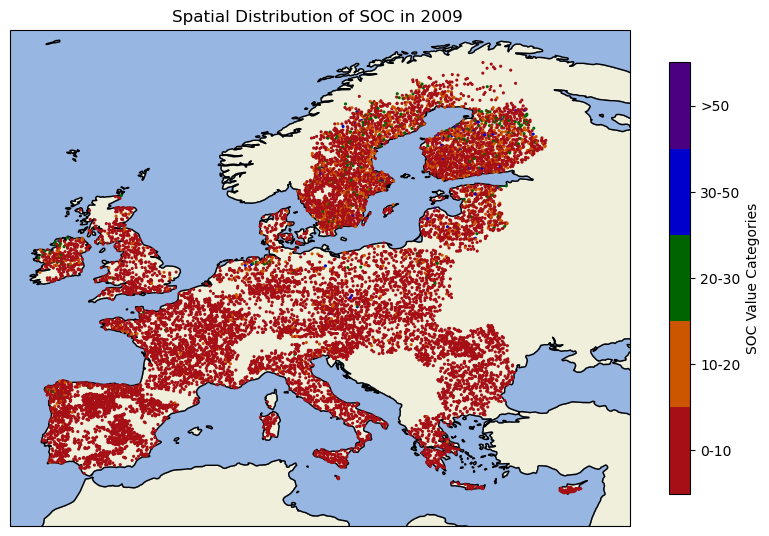

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

# Load data
data = pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2009_1.csv')
# 过滤数据，并使用 .copy() 避免 SettingWithCopyWarning
data = data[data['SOC'] <= 100].copy()

# --- 离散色带设置 ---
# 定义分箱的边界和对应的标签
# 您可以根据数据分布或需求调整这些边界和标签
bin_edges = [0, 10, 20, 30, 50, 101] # 定义分箱边界，例如 0-10, 10-20, 20-30, 30-50, 50-100 (使用101作为上界包含100)
bin_labels = ['0-10', '10-20', '20-30', '30-50', '>50'] # 对应的标签

# 使用 pd.cut 将 SOC 值分到不同的箱中，并获取整数编码
# include_lowest=True 确保包含第一个边界值 (0)
# right=False 表示区间是 [a, b) 左闭右开
data['SOC_bin'] = pd.cut(data['SOC'], bins=bin_edges, labels=False, include_lowest=True, right=False)

# 定义一个离散的颜色映射
# 颜色数量应与分箱数量一致 (len(bin_edges) - 1)
# 选择了深红、深橙、深绿、深蓝、深紫等鲜艳深色
colors = ['#a50f15', '#cc5500', '#006400', '#0000cd', '#4b0082'] # 更新为鲜艳的深色列表
cmap = ListedColormap(colors)

# 定义 Normalization，将分箱的整数编码映射到颜色
# 边界应该比整数编码偏移 0.5
bounds = np.arange(len(bin_labels) + 1) - 0.5
norm = BoundaryNorm(bounds, cmap.N)
# --- 离散色带设置结束 ---


def plot_europe():
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor='black') # 添加陆地边界
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([-12, 38, 32, 72], crs=ccrs.PlateCarree())
    return ax

# 2009 年空间分布
ax = plot_europe()

# 使用分箱后的 SOC_bin 作为颜色值，应用离散颜色映射和 Normalization
scatter_2009 = ax.scatter(data['Longitude'], data['Latitude'], c=data['SOC_bin'],
                          cmap=cmap, norm=norm, # 使用离散颜色映射和 Normalization
                          transform=ccrs.PlateCarree(), s=1.5)

# 创建离散色带
# ticks 设置为分箱的整数编码，标签设置为对应的分箱标签
cbar = plt.colorbar(scatter_2009, ticks=np.arange(len(bin_labels)), shrink=0.7)
cbar.set_ticklabels(bin_labels) # 设置色带标签

cbar.set_label('SOC Value Categories') # 修改色带标签
plt.title('Spatial Distribution of SOC in 2009 ') # 修改图标题
plt.show()

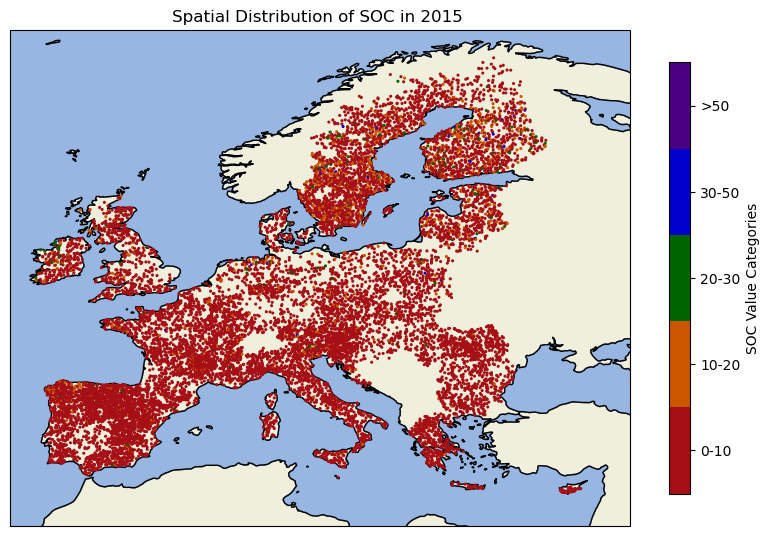

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

# Load data
data = pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2015_1.csv')
# 过滤数据，并使用 .copy() 避免 SettingWithCopyWarning
data = data[data['SOC'] <= 100].copy()

# --- 离散色带设置 ---
# 定义分箱的边界和对应的标签
# 您可以根据数据分布或需求调整这些边界和标签
bin_edges = [0, 10, 20, 30, 50, 101] # 定义分箱边界，例如 0-10, 10-20, 20-30, 30-50, 50-100 (使用101作为上界包含100)
bin_labels = ['0-10', '10-20', '20-30', '30-50', '>50'] # 对应的标签

# 使用 pd.cut 将 SOC 值分到不同的箱中，并获取整数编码
# include_lowest=True 确保包含第一个边界值 (0)
# right=False 表示区间是 [a, b) 左闭右开
data['SOC_bin'] = pd.cut(data['SOC'], bins=bin_edges, labels=False, include_lowest=True, right=False)

# 定义一个离散的颜色映射
# 颜色数量应与分箱数量一致 (len(bin_edges) - 1)
# 选择了深红、深橙、深绿、深蓝、深紫等鲜艳深色
colors = ['#a50f15', '#cc5500', '#006400', '#0000cd', '#4b0082'] # 更新为鲜艳的深色列表
cmap = ListedColormap(colors)

# 定义 Normalization，将分箱的整数编码映射到颜色
# 边界应该比整数编码偏移 0.5
bounds = np.arange(len(bin_labels) + 1) - 0.5
norm = BoundaryNorm(bounds, cmap.N)
# --- 离散色带设置结束 ---


def plot_europe():
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor='black') # 添加陆地边界
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([-12, 38, 32, 72], crs=ccrs.PlateCarree())
    return ax

# 2009 年空间分布
ax = plot_europe()

# 使用分箱后的 SOC_bin 作为颜色值，应用离散颜色映射和 Normalization
scatter_2009 = ax.scatter(data['Longitude'], data['Latitude'], c=data['SOC_bin'],
                          cmap=cmap, norm=norm, # 使用离散颜色映射和 Normalization
                          transform=ccrs.PlateCarree(), s=1.5)

# 创建离散色带
# ticks 设置为分箱的整数编码，标签设置为对应的分箱标签
cbar = plt.colorbar(scatter_2009, ticks=np.arange(len(bin_labels)), shrink=0.7)
cbar.set_ticklabels(bin_labels) # 设置色带标签

cbar.set_label('SOC Value Categories') # 修改色带标签
plt.title('Spatial Distribution of SOC in 2015 ') # 修改图标题
plt.show()

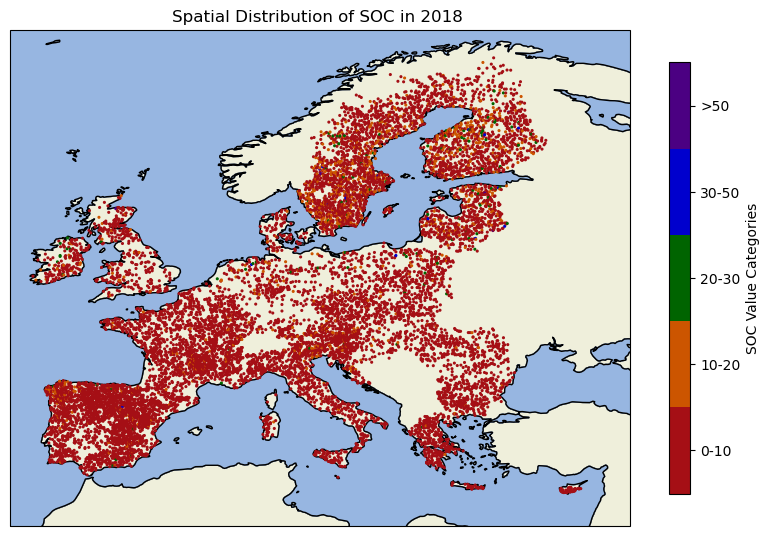

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

# Load data
data = pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2018_1.csv')
# 过滤数据，并使用 .copy() 避免 SettingWithCopyWarning
data = data[data['SOC'] <= 100].copy()

# --- 离散色带设置 ---
# 定义分箱的边界和对应的标签
# 您可以根据数据分布或需求调整这些边界和标签
bin_edges = [0, 10, 20, 30, 50, 101] # 定义分箱边界，例如 0-10, 10-20, 20-30, 30-50, 50-100 (使用101作为上界包含100)
bin_labels = ['0-10', '10-20', '20-30', '30-50', '>50'] # 对应的标签

# 使用 pd.cut 将 SOC 值分到不同的箱中，并获取整数编码
# include_lowest=True 确保包含第一个边界值 (0)
# right=False 表示区间是 [a, b) 左闭右开
data['SOC_bin'] = pd.cut(data['SOC'], bins=bin_edges, labels=False, include_lowest=True, right=False)

# 定义一个离散的颜色映射
# 颜色数量应与分箱数量一致 (len(bin_edges) - 1)
# 选择了深红、深橙、深绿、深蓝、深紫等鲜艳深色
colors = ['#a50f15', '#cc5500', '#006400', '#0000cd', '#4b0082'] # 更新为鲜艳的深色列表
cmap = ListedColormap(colors)

# 定义 Normalization，将分箱的整数编码映射到颜色
# 边界应该比整数编码偏移 0.5
bounds = np.arange(len(bin_labels) + 1) - 0.5
norm = BoundaryNorm(bounds, cmap.N)
# --- 离散色带设置结束 ---


def plot_europe():
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor='black') # 添加陆地边界
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([-12, 38, 32, 72], crs=ccrs.PlateCarree())
    return ax

# 2009 年空间分布
ax = plot_europe()

# 使用分箱后的 SOC_bin 作为颜色值，应用离散颜色映射和 Normalization
scatter_2009 = ax.scatter(data['Longitude'], data['Latitude'], c=data['SOC_bin'],
                          cmap=cmap, norm=norm, # 使用离散颜色映射和 Normalization
                          transform=ccrs.PlateCarree(), s=1.5)

# 创建离散色带
# ticks 设置为分箱的整数编码，标签设置为对应的分箱标签
cbar = plt.colorbar(scatter_2009, ticks=np.arange(len(bin_labels)), shrink=0.7)
cbar.set_ticklabels(bin_labels) # 设置色带标签

cbar.set_label('SOC Value Categories') # 修改色带标签
plt.title('Spatial Distribution of SOC in 2018 ') # 修改图标题
plt.show()

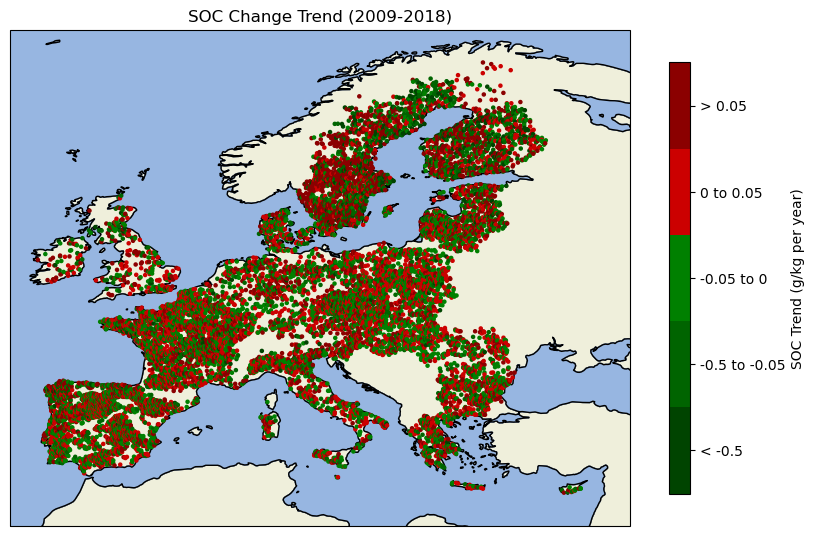

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import linregress
from matplotlib.colors import ListedColormap, BoundaryNorm # 导入 ListedColormap 和 BoundaryNorm

# 读取数据并过滤SOC > 100的值
data_2009 = pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2009_1.csv')
data_2015 = pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2015_1.csv')
data_2018 = pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2018_1.csv')

# Apply filter and use .copy() to avoid SettingWithCopyWarning
data_2009 = data_2009[data_2009['SOC'] <= 120].copy()
data_2015 = data_2015[data_2015['SOC'] <= 120].copy()
data_2018 = data_2018[data_2018['SOC'] <= 120].copy()


# 通过 ID 进行匹配，找到所有年份都存在的 ID
common_ids = set(data_2009['ID']).intersection(set(data_2015['ID']), set(data_2018['ID']))

# 过滤出相同 ID 的数据
data_2009 = data_2009[data_2009['ID'].isin(common_ids)].copy() # Use .copy()
data_2015 = data_2015[data_2015['ID'].isin(common_ids)].copy() # Use .copy()
data_2018 = data_2018[data_2018['ID'].isin(common_ids)].copy() # Use .copy()

# 按照 ID 进行合并
# Ensure columns are correctly selected before renaming and merging
merged_data = data_2009[['ID', 'Longitude', 'Latitude', 'SOC']].rename(columns={'SOC': 'SOC_2009'}) \
    .merge(data_2015[['ID', 'SOC']].rename(columns={'SOC': 'SOC_2015'}), on='ID') \
    .merge(data_2018[['ID', 'SOC']].rename(columns={'SOC': 'SOC_2018'}), on='ID')

# 计算 SOC 变化趋势（线性回归斜率）
years = np.array([2009, 2015, 2018])

slopes = []
# It's generally more efficient to apply a function row-wise using apply or list comprehension
# rather than iterrows for large DataFrames. However, for clarity and direct modification of user's logic, keep iterrows for now.
for index, row in merged_data.iterrows(): # Use index, row for iterrows
    soc_values = np.array([row['SOC_2009'], row['SOC_2015'], row['SOC_2018']])
    # Check if there are enough valid data points for linregress (at least 2)
    # Note: With common_ids filter, each row should have 3 SOC values, but checking is safer.
    if np.sum(~np.isnan(soc_values)) >= 2:
        # Ignore divide by zero and other potential runtime warnings from linregress on small data
        with np.errstate(all='ignore'):
             slope, _, _, _, _ = linregress(years, soc_values)  # 计算斜率
        slopes.append(slope)
    else:
        slopes.append(np.nan) # Append NaN if slope cannot be calculated


merged_data['SOC_trend'] = slopes  # 添加趋势列

# Handle potential NaNs in SOC_trend before plotting
merged_data.dropna(subset=['SOC_trend'], inplace=True) # Remove rows where trend could not be calculated

# --- 离散色带设置 for Trend ---
# Define bins and labels for the trend values, clearly separating positive and negative at 0
# IMPORTANT: ADJUST THESE BIN EDGES BASED ON THE ACTUAL RANGE OF YOUR CALCULATED SLOPES
# You can print merged_data['SOC_trend'].describe() to see the range and adjust bins accordingly
# Using 5 bins: Very Negative, Moderately Negative, Slightly Negative (-0.05 to 0), Slightly Positive (0 to 0.05), Very Positive
# Intervals are [a, b) due to right=False
trend_bin_edges = [-np.inf, -0.5, -0.05, 0, 0.05, np.inf] # 示例分箱边界，以0为中心划分
trend_bin_labels = ['< -0.5', '-0.5 to -0.05', '-0.05 to 0', '0 to 0.05', '> 0.05'] # 对应的标签

# Use pd.cut to assign each SOC_trend value to a bin, get integer codes
# include_lowest=True 包括第一个边界值 [-inf, -0.5)
# right=False means intervals are [a, b). This ensures 0 falls into [0, 0.05).
merged_data['SOC_trend_bin'] = pd.cut(merged_data['SOC_trend'], bins=trend_bin_edges, labels=False, include_lowest=True, right=False)

# Define a discrete colormap with 5 vivid dark colors, green for negative, red for positive
# Color sequence: Very dark green -> Dark green -> Green (for -0.05 to 0) -> Red (for 0 to 0.05) -> Very dark red
colors_trend = ['#004400', '#006400', '#008000', '#cc0000', '#8b0000'] # 非常深的绿, 深绿, 绿, 红, 非常深的红
cmap_trend = ListedColormap(colors_trend)

# Define Normalization for the trend bins
# Bounds should be slightly offset from the integer codes (0, 1, 2, 3, 4)
bounds_trend = np.arange(len(trend_bin_labels) + 1) - 0.5
norm_trend = BoundaryNorm(bounds_trend, cmap_trend.N)
# --- 离散色带设置结束 ---


# ---- 画图 ----
def plot_europe():
    """ 绘制欧洲地图 """
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([-12, 38, 32, 72], crs=ccrs.PlateCarree())
    return ax

# 绘制趋势变化的地图
ax = plot_europe()
# Use the trend bins for color mapping
scatter = ax.scatter(merged_data['Longitude'], merged_data['Latitude'],
                     c=merged_data['SOC_trend_bin'], # Use the trend bin codes for color
                     cmap=cmap_trend, norm=norm_trend, # Use the discrete colormap and norm
                     transform=ccrs.PlateCarree(), s=5)

# 创建离散色带
# ticks 设置为分箱的整数编码，标签设置为对应的分箱标签
cbar = plt.colorbar(scatter, ticks=np.arange(len(trend_bin_labels)), shrink=0.7)
cbar.set_ticklabels(trend_bin_labels) # 设置色带标签

cbar.set_label('SOC Trend (g/kg per year)') # 更新色带标签
plt.title('SOC Change Trend (2009-2018)') # 更新图标题
plt.show()

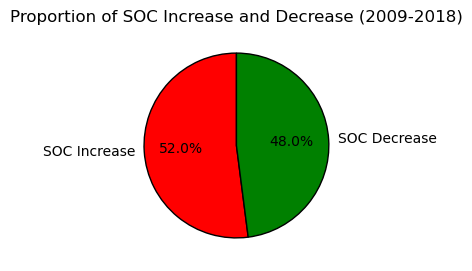

In [19]:
import matplotlib.pyplot as plt

# 计算增加和减少的数量
num_increase = (merged_data['SOC_trend'] > 0).sum()
num_decrease = (merged_data['SOC_trend'] < 0).sum()

# 计算占比
total = num_increase + num_decrease
sizes = [num_increase / total, num_decrease / total]

# 设置标签和颜色
labels = ['SOC Increase', 'SOC Decrease']
colors = ['red', 'green']

# 绘制饼图
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of SOC Increase and Decrease (2009-2018)')
plt.show()


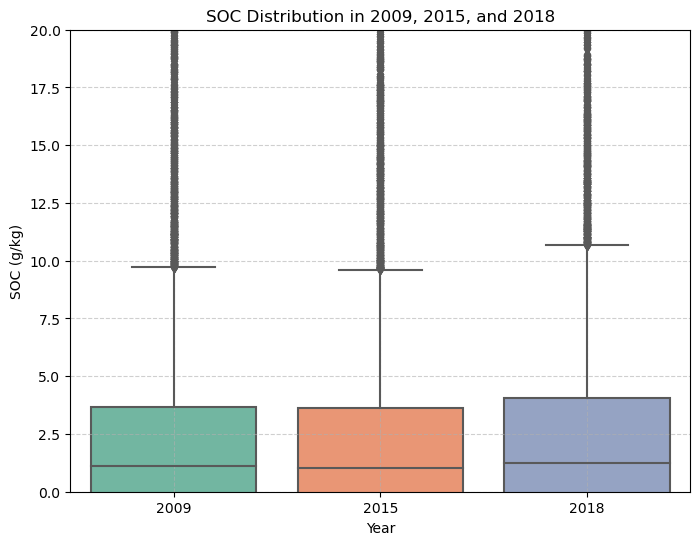

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 整理数据，使其适合绘制箱型图
data_melted = merged_data.melt(id_vars=['ID'], value_vars=['SOC_2009', 'SOC_2015', 'SOC_2018'], 
                               var_name='Year', value_name='SOC')

# 替换年份标签，方便阅读
data_melted['Year'] = data_melted['Year'].str.replace('SOC_', '')

# 绘制箱型图
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='SOC', data=data_melted, palette='Set2')

# 添加标题和标签
plt.title('SOC Distribution in 2009, 2015, and 2018')
plt.xlabel('Year')
plt.ylabel('SOC (g/kg)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 20)

# 显示图像
plt.show()


In [32]:
import scipy.stats as stats

# 提取每一年 SOC 数据
soc_2009 = merged_data['SOC_2009']
soc_2015 = merged_data['SOC_2015']
soc_2018 = merged_data['SOC_2018']

# 进行单因素方差分析（ANOVA）
f_stat, p_value = stats.f_oneway(soc_2009, soc_2015, soc_2018)

# 输出结果
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# 进行结论判断
if p_value < 0.05:
    print("There is a significant difference in SOC between the years.")
else:
    print("There is no significant difference in SOC between the years.")


F-statistic: 14.854060816463766
P-value: 3.5589504178979455e-07
There is a significant difference in SOC between the years.


In [33]:
import scipy.stats as stats

# 2009 vs 2015
t_stat_2009_2015, p_value_2009_2015 = stats.ttest_ind(soc_2009, soc_2015)
print(f"2009 vs 2015 - t-statistic: {t_stat_2009_2015}, p-value: {p_value_2009_2015}")

# 2009 vs 2018
t_stat_2009_2018, p_value_2009_2018 = stats.ttest_ind(soc_2009, soc_2018)
print(f"2009 vs 2018 - t-statistic: {t_stat_2009_2018}, p-value: {p_value_2009_2018}")

# 2015 vs 2018
t_stat_2015_2018, p_value_2015_2018 = stats.ttest_ind(soc_2015, soc_2018)
print(f"2015 vs 2018 - t-statistic: {t_stat_2015_2018}, p-value: {p_value_2015_2018}")

# 结论
alpha = 0.05  # 显著性水平
if p_value_2009_2015 < alpha:
    print("There is a significant difference between 2009 and 2015.")
else:
    print("There is no significant difference between 2009 and 2015.")

if p_value_2009_2018 < alpha:
    print("There is a significant difference between 2009 and 2018.")
else:
    print("There is no significant difference between 2009 and 2018.")

if p_value_2015_2018 < alpha:
    print("There is a significant difference between 2015 and 2018.")
else:
    print("There is no significant difference between 2015 and 2018.")


2009 vs 2015 - t-statistic: 0.8800389835724335, p-value: 0.3788460032517176
2009 vs 2018 - t-statistic: -4.24367440383992, p-value: 2.2062052699834923e-05
2015 vs 2018 - t-statistic: -5.145932698347545, p-value: 2.680521807990384e-07
There is no significant difference between 2009 and 2015.
There is a significant difference between 2009 and 2018.
There is a significant difference between 2015 and 2018.


/tmp/ipykernel_12095/1434250267.py:7: DtypeWarning: Columns (7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2018_with_SOC.csv')


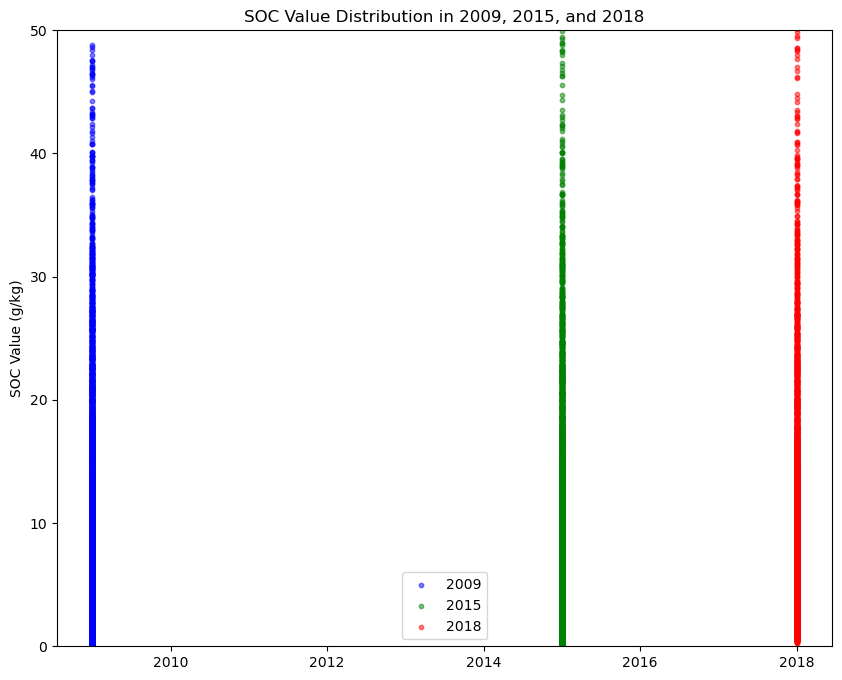

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data_2009 = pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2009_with_SOC.csv')
data_2015 = pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2015_with_SOC.csv')
data_2018 = pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2018_with_SOC.csv')

# 过滤掉SOC大于100的行
data_2009 = data_2009[data_2009['SOC'] <= 100]
data_2015 = data_2015[data_2015['SOC'] <= 100]
data_2018 = data_2018[data_2018['SOC'] <= 100]

# 提取每一年的SOC数据，并添加年份标签
soc_2009 = data_2009['SOC']
soc_2015 = data_2015['SOC']
soc_2018 = data_2018['SOC']

# 创建一个散点图，显示每年SOC数值
plt.figure(figsize=(10, 8))

# 绘制 2009 年数据
plt.scatter([2009] * len(soc_2009), soc_2009, c='blue', label='2009', alpha=0.5, s=10)

# 绘制 2015 年数据
plt.scatter([2015] * len(soc_2015), soc_2015, c='green', label='2015', alpha=0.5, s=10)

# 绘制 2018 年数据
plt.scatter([2018] * len(soc_2018), soc_2018, c='red', label='2018', alpha=0.5, s=10)

# 添加标签和标题
plt.ylabel('SOC Value (g/kg)')
plt.title('SOC Value Distribution in 2009, 2015, and 2018')

# 设置y轴范围
plt.ylim(0, 50)

# 添加图例
plt.legend()

# 显示图形
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from matplotlib import rcParams
import numpy as np
# from matplotlib.ticker import PercentFormatter # 移除 PercentFormatter，因为SOC不是百分比变化率

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']  # 英文用Times New Roman

# 文件路径
file_path_2009 = r'/mnt/d/study/组会/data/SOC/soc_filled_2009_with_SOC.csv'
file_path_2015 = r'/mnt/d/study/组会/data/SOC/soc_filled_2015_with_SOC.csv'
file_path_2018 = r'/mnt/d/study/组会/data/SOC/soc_filled_2018_with_SOC.csv'

# 读取数据并过滤SOC > 100的值，添加年份列
data_2009 = pd.read_csv(file_path_2009)
data_2009 = data_2009[data_2009['SOC'] <= 100].copy() # 过滤并使用copy()
data_2009['Year'] = 2009

data_2015 = pd.read_csv(file_path_2015)
data_2015 = data_2015[data_2015['SOC'] <= 100].copy() # 过滤并使用copy()
data_2015['Year'] = 2015

data_2018 = pd.read_csv(file_path_2018)
data_2018 = data_2018[data_2018['SOC'] <= 100].copy() # 过滤并使用copy()
data_2018['Year'] = 2018

# 将三年的数据合并到长格式 DataFrame 中
# 只选择 'SOC' 和 'Year' 列进行合并，如果需要ID可以保留
df_soc = pd.concat([
    data_2009[['SOC', 'Year']],
    data_2015[['SOC', 'Year']],
    data_2018[['SOC', 'Year']]
])

# 可选：按照年份排序，以便绘图时x轴顺序正确
df_soc['Year'] = df_soc['Year'].astype(str) # 将年份转换为字符串，避免plt自动按数值排序
df_soc = df_soc.sort_values('Year')


# 设置样式
pal = sns.color_palette("Set2", n_colors=len(df_soc['Year'].unique())) # 根据年份数量设置颜色
plt.figure(figsize=(8, 6))
ax = plt.gca()

# 获取唯一的年份列表，用于设置x轴范围和循环
unique_years = df_soc['Year'].unique()

# 1. 绘制半小提琴图
# x轴使用 'Year', y轴使用 'SOC'
pt.half_violinplot(x='Year', y='SOC', data=df_soc,
                   palette=pal, bw=.2, cut=0., scale="area", zorder=-1,
                   width=.6, inner=None, orient="v", linewidth=1)
# 设置x轴范围，根据唯一的年份数量调整
ax.set_xlim(-0.5, len(unique_years) - 0.5)

# 2. 箱线图（黑色中位线）
# x轴使用 'Year', y轴使用 'SOC'
sns.boxplot(x='Year', y='SOC', data=df_soc,
            width=.12, color="black", zorder=10,
            showcaps=True,
            boxprops={'facecolor': 'none', "zorder": 10, "edgecolor": "black"},
            whiskerprops={"linewidth": 1.5, "zorder": 10},
            medianprops={"color": "black", "linewidth": 1.5},
            showfliers=False)

# 添加散点
# x轴使用 'Year', y轴使用 'SOC'
sns.stripplot(x='Year', y='SOC', data=df_soc,
              palette=pal, size=4, # 调整点的大小，可能数据量大
              jitter=0.1, zorder=0, alpha=0.6)

# 3. 添加平均值和中位数标注
# 循环遍历唯一的年份
for i, year in enumerate(unique_years):
    # 过滤出当前年份的数据
    soc_values_year = df_soc[df_soc['Year'] == year]['SOC']
    mean_val = soc_values_year.mean()
    median_val = soc_values_year.median()

    # 绘制平均值点（空心圆，黑边）
    ax.scatter(i, mean_val, facecolor='none', marker="o", edgecolor="black", s=70, zorder=100)

    # 添加平均值和中位数文本标注
    # 调整文本位置，可能需要微调y坐标
    ax.text(i, ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.05, # 放置在图的底部附近
             f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}', # 格式化SOC值，不是百分比
             ha='center', va='bottom', color='black', fontsize=10, fontfamily='serif') # 调整字体大小

# 设置坐标轴标签字体
plt.ylabel("SOC Value (g/kg)", fontsize=14) # 修改y轴标签
plt.xticks(ticks=np.arange(len(unique_years)), labels=unique_years, fontsize=12, fontfamily='serif') # 设置x轴刻度和标签
plt.yticks(fontsize=12, fontfamily='serif')

# 添加参考线 (根据SOC的含义，0作为参考线可能意义不大，如果需要其他参考值可以修改)
# plt.axhline(0, linestyle="--", c="grey", linewidth=1.2, zorder=0, alpha=0.4) # 如果0没有特殊意义可以移除

# ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # 移除百分比格式化
plt.xlabel("Year", fontsize=14) # 添加x轴标签
plt.tick_params(labelsize=12) # 调整刻度标签大小

# 美化图形
sns.despine(trim=False)
plt.tight_layout()
plt.title('Distribution of SOC Value by Year (2009, 2015, 2018)', fontsize=16) # 添加图标题
plt.show()

ModuleNotFoundError: No module named 'ptitprince'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from matplotlib import rcParams
import numpy as np
from matplotlib.ticker import PercentFormatter

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']  # 英文用Times New Roman

# 读取并过滤数据
file_path = 'typhoon2.csv'
data = pd.read_csv(file_path, encoding='gbk')
cols_to_filter = ['净变化率_EVI_Forest', '净变化率_EVI_Grassland', '净变化率_EVI_Cropland']
for col in cols_to_filter:
    data = data[(data[col] >= -1) & (data[col] <= 1)]

# 准备长格式数据
df = pd.melt(data,
             value_vars=cols_to_filter,
             var_name='Land Type',
             value_name='Net EVI Change Rate')
df['Land Type'] = df['Land Type'].str.replace('净变化率_EVI_', '')

# 设置样式
pal = sns.color_palette("Set2")
plt.figure(figsize=(8, 6))
ax = plt.gca()

# 1. 绘制半小提琴图
pt.half_violinplot(x='Land Type', y='Net EVI Change Rate', data=df,
                   palette=pal, bw=.2, cut=0., scale="area", zorder=-1,
                   width=.6, inner=None, orient="v", linewidth=1)
ax.set_xlim(-0.5, len(df['Land Type'].unique()) - 0.5)

# 2. 箱线图（黑色中位线）
sns.boxplot(x='Land Type', y='Net EVI Change Rate', data=df,
            width=.12, color="black", zorder=10,
            showcaps=True,
            boxprops={'facecolor': 'none', "zorder": 10, "edgecolor": "black"},
            whiskerprops={"linewidth": 1.5, "zorder": 10},
            medianprops={"color": "black", "linewidth": 1.5},
            showfliers=False)

# 添加散点
sns.stripplot(x='Land Type', y='Net EVI Change Rate', data=df,
              palette=pal, size=8,
              jitter=0.1, zorder=0, alpha=0.6)

# 3. 添加平均值标注（红色半边虚线）
for i, land_type in enumerate(df['Land Type'].unique()):
    mean_val = df[df['Land Type'] == land_type]['Net EVI Change Rate'].mean()
    mid_val = df[df['Land Type'] == land_type]['Net EVI Change Rate'].median()
    ax.scatter(i, mean_val, facecolor='none', marker="o", edgecolor="black", s=70, zorder=100)
    ax.text(i - 0.1, -0.55, f'Mean: {mean_val:.2%}\nMedian: {mid_val:.2%}',
            ha='left', va='center', color='black', fontsize=14, fontfamily='serif')


# 设置坐标轴标签字体（中文自动用宋体，英文自动用Times New Roman）
plt.ylabel("EVI Net Change (%)", fontsize=14)
plt.xticks(fontsize=12, fontfamily='serif')
plt.yticks(fontsize=12, fontfamily='serif')

# 添加参考线
plt.axhline(0, linestyle="--", c="grey", linewidth=1.2, zorder=0, alpha=0.4)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # 1.0表示原始数据=100%
plt.xlabel("")
plt.tick_params(labelsize=14)


# 美化图形
sns.despine(trim=False)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import rasterio # 用于读取和写入 GeoTIFF 文件
import joblib # 用于加载训练好的模型、imputer 和 scaler
import os # 用于文件路径操作

# --- 1. 定义输入和输出 ---

# 定义协变量的根文件夹路径，其中包含各种协变量的 TIFF 文件
# 请将此路径替换为您的实际文件路径
covariate_tiffs_folder = r'/mnt/g/ECI_N/'

# 定义输出预测结果的文件夹路径
# 确保这个文件夹已经存在
output_predictions_folder = r'/mnt/d/study/组会/data/Predicted_SOC_Tiff/'

# 定义您要进行预测的年份
prediction_years = [2009, 2015, 2018]

# --- 2. 加载训练时使用的对象 ---

# **重要：** 请在这里加载您在模型训练脚本中保存的 fitted imputer, scaler 和 feature_names
# 假设您已经使用 joblib 保存了它们
try:
    loaded_final_model = joblib.load(r'/mnt/d/study/组会/data/soc/rf_soc_article.joblib')
    # 假设您在训练脚本中保存了 imputer 和 scaler
    # 例如： joblib.dump(imputer, 'fitted_imputer.joblib')
    # 例如： joblib.dump(scaler, 'fitted_scaler.joblib')
    # 例如： joblib.dump(X_train.columns.tolist(), 'feature_names.joblib') # 保存列名列表
    loaded_imputer = joblib.load('fitted_imputer.joblib')
    loaded_scaler = joblib.load('fitted_scaler.joblib')
    feature_names = joblib.load('feature_names.joblib') # 加载特征列名列表
    print("已成功加载模型、Imputer、Scaler 和特征名称。")
except FileNotFoundError:
    print("错误：未能找到保存的模型、Imputer、Scaler 或特征名称文件。")
    print("请确保在模型训练脚本中保存了这些对象，并指定了正确的文件路径。")
    # 在实际运行中，您可能需要在这里退出或采取其他错误处理措施
    exit() # 示例：如果文件不存在则退出

# 确认特征名称的数量与训练模型时的输入特征数量一致
if len(feature_names) != loaded_final_model.n_features_in_:
     print(f"警告: 加载的特征名称数量 ({len(feature_names)}) 与模型期望的特征数量 ({loaded_final_model.n_features_in_}) 不匹配。")
     print("请检查 feature_names.joblib 文件是否与训练模型时使用的特征一致。")
     # 实际应用中，这可能是严重错误，可能需要终止
     # exit() # 示例：如果不匹配则退出

# --- 3. 定义静态和动态变量（根据您的描述） ---
# 根据您之前提供的信息和常见的变量类型，大致区分静态和动态变量
# 请根据您实际使用的协变量名称进行调整
dynamic_vars = ['NPP', 'TM', 'PRE'] # 示例：这些变量可能随年份变化
# 静态变量为 feature_names 中除了 dynamic_vars 之外的变量
static_vars = [var for var in feature_names if var not in dynamic_vars]

print(f"动态变量 ({len(dynamic_vars)}): {dynamic_vars}")
print(f"静态变量 ({len(static_vars)}): {static_vars}")


# --- 4. 循环年份进行预测 ---

for year in prediction_years:
    print(f"\n--- 正在模拟 {year} 年的 SOC 分布 ---")

    # 用于存储当前年份所有协变量栅格数据的列表
    current_year_rasters = []
    # 用于存储第一个栅格的元数据（用于保存输出）
    output_meta = None
    raster_shape = None

    # --- 4.1. 读取和堆叠当前年份的协变量栅格 ---
    print("  - 读取协变量栅格...")
    # 按照 feature_names 中定义的顺序读取栅格，这与模型期望的输入顺序一致
    for i, var_name in enumerate(feature_names):
        # 构造当前协变量和年份对应的 TIFF 文件路径
        # 假设文件命名为 EU_变量名_年份.tif
        tiff_file_path = os.path.join(covariate_tiffs_folder, f'EU_{var_name}_{year}.tif')

        if not os.path.exists(tiff_file_path):
             print(f"    警告: 未找到文件: {tiff_file_path}。 跳过此变量。")
             # 在实际中，如果某个关键变量的 TIFF 丢失，这可能是严重错误
             # 您需要决定是跳过，还是填充默认值，或者中断。
             # 为了让代码能跑起来，这里先跳过，但请检查您的数据文件。
             # 注意：如果跳过了模型期望的某个特征，预测结果可能会不准确或出错。
             # 最好的做法是确保所有模型输入特征对应的 TIFF 都存在。
             continue # 跳过当前循环中的协变量

        try:
            with rasterio.open(tiff_file_path) as src:
                # 读取第一个波段的数据
                raster_data = src.read(1)

                # 获取并存储第一个栅格的元数据和形状，用于后续保存
                if output_meta is None:
                    output_meta = src.profile
                    raster_shape = raster_data.shape # (height, width)
                    print(f"    栅格尺寸: {raster_shape[0]} 高 x {raster_shape[1]} 宽")


                # 将 NoData 值转换为 NaN，以便 Imputer 处理
                if src.nodata is not None:
                    raster_data = raster_data.astype(np.float32) # 转换为浮点类型以便存储 NaN
                    raster_data[raster_data == src.nodata] = np.nan


                # 将读取的栅格数据添加到列表中
                current_year_rasters.append(raster_data)

        except rasterio.errors.RasterioIOError as e:
            print(f"    错误: 无法读取文件 {tiff_file_path}: {e}")
            continue # 如果文件读取失败，跳过此变量


    # 检查是否成功读取了所有必需的协变量栅格
    if len(current_year_rasters) != len(feature_names):
        print(f"错误: 未能为 {year} 年加载所有 {len(feature_names)} 个必需的协变量栅格。只加载了 {len(current_year_rasters)} 个。")
        print("请检查上述警告信息，确认是哪些文件缺失。 跳过此年份的模拟。")
        continue # 跳过当前年份的模拟

    # 将所有栅格堆叠成一个 NumPy 数组
    # 形状会是 (n_features, height, width)
    stacked_rasters = np.stack(current_year_rasters, axis=0)
    print(f"  - 协变量栅格堆叠完成，形状: {stacked_rasters.shape}")

    # --- 4.2. 重塑数据为模型输入形状 (n_samples, n_features) ---
    # 将形状 (n_features, height, width) 转换为 (height * width, n_features)
    # 需要先转置轴，然后展平除了最后一个轴之外的所有维度
    reshaped_data = stacked_rasters.transpose(1, 2, 0).reshape(-1, len(feature_names))
    print(f"  - 数据重塑完成，形状: {reshaped_data.shape}")

    # --- 4.3. 处理缺失值（使用训练时的 Imputer） ---
    print("  - 使用训练时的 Imputer 处理缺失值...")
    # loaded_imputer 是已经 fit 好的 Imputer 对象
    imputed_data = loaded_imputer.transform(reshaped_data)
    print("  - 缺失值处理完成。")

    # --- 4.4. 标准化数据（使用训练时的 Scaler） ---
    print("  - 使用训练时的 Scaler 进行标准化...")
    # loaded_scaler 是已经 fit 好的 Scaler 对象
    scaled_data = loaded_scaler.transform(imputed_data)
    print("  - 标准化完成。")

    # --- 4.5. 使用训练好的模型进行预测 ---
    print("  - 使用模型进行预测...")
    # loaded_final_model 是训练好的模型对象
    predicted_soc_flat = loaded_final_model.predict(scaled_data)
    print("  - 预测完成。")

    # --- 4.6. 将预测结果重塑回栅格形状 ---
    # 将形状 (height * width,) 转换回 (height, width)
    predicted_soc_raster = predicted_soc_flat.reshape(raster_shape)
    print(f"  - 预测结果重塑完成，形状: {predicted_soc_raster.shape}")

    # --- 4.7. 保存预测结果为 GeoTIFF ---
    output_filename = f'Predicted_SOC_{year}.tif'
    output_path = os.path.join(output_predictions_folder, output_filename)

    # 更新输出栅格的元数据
    output_meta.update({
        'driver': 'GTiff',
        'dtype': rasterio.float32, # 保存为浮点类型
        'count': 1, # 输出只有一个波段
        'nodata': -9999 # 设置一个 NoData 值，例如 -9999
    })

    print(f"  - 正在保存预测栅格到: {output_path}")
    with rasterio.open(output_path, 'w', **output_meta) as dst:
        dst.write(predicted_soc_raster, 1) # 写入第一个波段

    print(f"--- {year} 年 SOC 分布模拟完成并保存。---")

print("\n所有年份的 SOC 分布模拟已完成。")